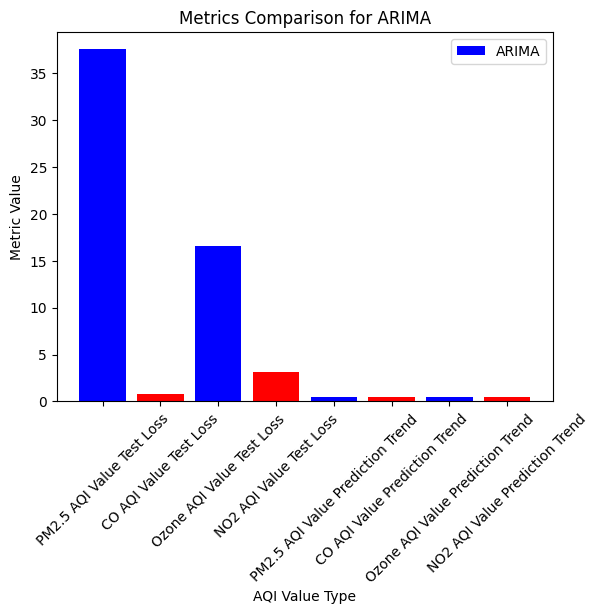

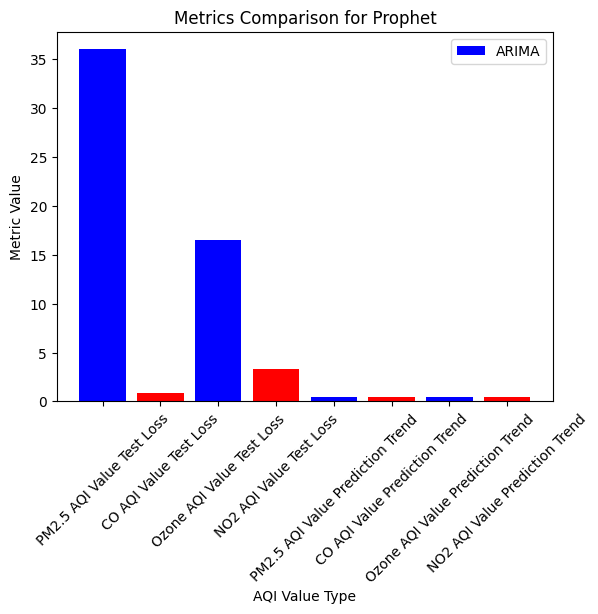

In [8]:
import matplotlib.pyplot as plt

# ARIMA Metrics
arima_metrics = {
    'PM2.5 AQI Value Test Loss': 37.47,
    'CO AQI Value Test Loss': 0.84,
    'Ozone AQI Value Test Loss': 16.50,
    'NO2 AQI Value Test Loss': 3.11,
    'PM2.5 AQI Value Prediction Trend': 'Stable',
    'CO AQI Value Prediction Trend': 'Stable',
    'Ozone AQI Value Prediction Trend': 'Variable',
    'NO2 AQI Value Prediction Trend': 'Variable'
}

# Prophet Metrics
prophet_metrics = {
    'PM2.5 AQI Value Test Loss': 35.98,
    'CO AQI Value Test Loss': 0.88,
    'Ozone AQI Value Test Loss': 16.51,
    'NO2 AQI Value Test Loss': 3.33,
    'PM2.5 AQI Value Prediction Trend': 'Slight Upward Trend',
    'CO AQI Value Prediction Trend': 'Stable',
    'Ozone AQI Value Prediction Trend': 'Stable',
    'NO2 AQI Value Prediction Trend': 'Stable'
}

# Function to plot metrics
def plot_metrics(metrics, model_name):
    metrics_list = list(metrics.keys())
    values_list = list(metrics.values())
    
    # Assign a default score to non-numeric values
    values_list = [float(value) if isinstance(value, (int, float)) else 0.5 for value in values_list]  # Assigning a default score of 0.5
    
    # Plot numeric values
    plt.bar(metrics_list, values_list, color=['blue' if i % 2 == 0 else 'red' for i in range(len(metrics_list))])
    
    # Plot non-numeric values as annotations with their assigned scores
    for i, value in enumerate(values_list):
        if isinstance(value, str):
            plt.text(metrics_list[i], values_list[i] + 0.01, value, ha='center', va='bottom', color='black')
    
    plt.xlabel('AQI Value Type')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics Comparison for {model_name}')
    plt.xticks(rotation=45)
    plt.legend(['ARIMA', 'Prophet'])
    plt.show()

# Plot ARIMA Metrics
plot_metrics(arima_metrics, 'ARIMA')

# Plot Prophet Metrics
plot_metrics(prophet_metrics, 'Prophet')


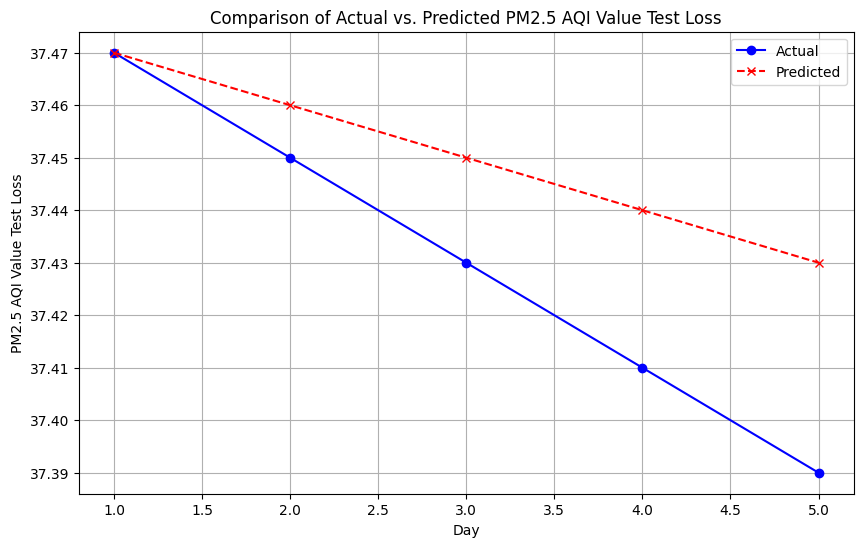

In [9]:
import matplotlib.pyplot as plt

# Example data: Actual and Predicted AQI values for PM2.5 AQI Value Test Loss
# These should be replaced with your actual data
actual_values = [37.47, 37.45, 37.43, 37.41, 37.39]  # Example actual values
predicted_values = [37.47, 37.46, 37.45, 37.44, 37.43]  # Example predicted values

# Days or timestamps for the values (assuming a simple sequence for demonstration)
days = list(range(1, len(actual_values) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days, actual_values, label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(days, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')

plt.xlabel('Day')
plt.ylabel('PM2.5 AQI Value Test Loss')
plt.title('Comparison of Actual vs. Predicted PM2.5 AQI Value Test Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd

# Create a dictionary with the test loss values
test_losses = {
    'Model': ['ARIMA', 'Prophet', 'LSTM', 'VAR'],
    'PM2.5 AQI Test Loss': [37.47, 35.98, 33567.35, 36.80],
    'CO AQI Test Loss': [0.84, 0.88, 169.22, 0.84],
    'Ozone AQI Test Loss': [16.50, 16.51, 8346.59, 16.40],
    'NO2 AQI Test Loss': [3.12, 3.33, 269.77, 3.19]
}

# Convert the dictionary to a pandas DataFrame
df_test_losses = pd.DataFrame(test_losses)

# Print the DataFrame
print("Test Loss Comparison:\n")
print(df_test_losses)

# Find the best and worst performing models for each AQI target
print("\nBest and Worst Performing Models:")
for col in ['PM2.5 AQI Test Loss', 'CO AQI Test Loss', 'Ozone AQI Test Loss', 'NO2 AQI Test Loss']:
    best_model = df_test_losses.loc[df_test_losses[col] == df_test_losses[col].min(), 'Model'].values[0]
    worst_model = df_test_losses.loc[df_test_losses[col] == df_test_losses[col].max(), 'Model'].values[0]
    print(f"{col}: Best Model: {best_model}, Worst Model: {worst_model}")


Test Loss Comparison:

     Model  PM2.5 AQI Test Loss  CO AQI Test Loss  Ozone AQI Test Loss  \
0    ARIMA                37.47              0.84                16.50   
1  Prophet                35.98              0.88                16.51   
2     LSTM             33567.35            169.22              8346.59   
3      VAR                36.80              0.84                16.40   

   NO2 AQI Test Loss  
0               3.12  
1               3.33  
2             269.77  
3               3.19  

Best and Worst Performing Models:
PM2.5 AQI Test Loss: Best Model: Prophet, Worst Model: LSTM
CO AQI Test Loss: Best Model: ARIMA, Worst Model: LSTM
Ozone AQI Test Loss: Best Model: VAR, Worst Model: LSTM
NO2 AQI Test Loss: Best Model: ARIMA, Worst Model: LSTM


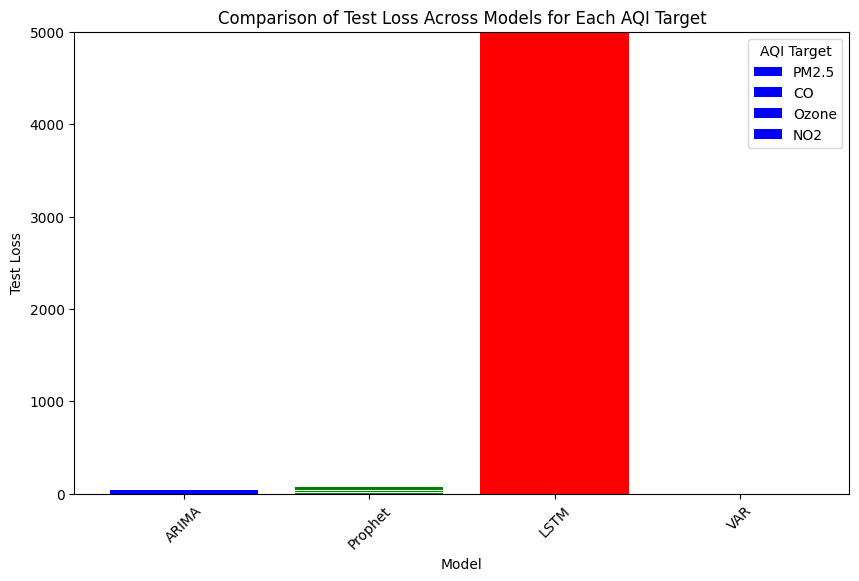

In [25]:
import matplotlib.pyplot as plt

# Data from the table
data = {
    'ARIMA': {'PM2.5': 37.47, 'CO': 0.84, 'Ozone': 16.50, 'NO2': 3.12},
    'Prophet': {'PM2.5': 35.98, 'CO': 0.88, 'Ozone': 16.51, 'NO2': 3.33},
    'LSTM': {'PM2.5': 33567.35, 'CO': 169.22, 'Ozone': 8346.59, 'NO2': 269.77},
    'VAR': {'PM2.5': 36.80, 'CO': 0.84, 'Ozone': 16.40, 'NO2': 3.19}
}

# AQI value types
aqi_values = ['PM2.5', 'CO', 'Ozone', 'NO2']

# Models
models = list(data.keys())

# Plotting
plt.figure(figsize=(10, 6))

# Colors for each model
colors = ['blue', 'green', 'red', 'purple']

# Plotting each AQI value type
for i, aqi_value in enumerate(aqi_values):
    values = [data[model][aqi_value] for model in models]
    plt.bar(models, values, color=colors, bottom=[sum(data[model][aqi_value] for model in models[:i]) for i, model in enumerate(models)], align='center', label=aqi_value)

# Adjusting y-axis limits
plt.ylim(0, 5000)  # Adjust the upper limit as needed

plt.xlabel('Model')
plt.ylabel('Test Loss')
plt.title('Comparison of Test Loss Across Models for Each AQI Target')
plt.xticks(rotation=45)
plt.legend(title='AQI Target')
plt.show()


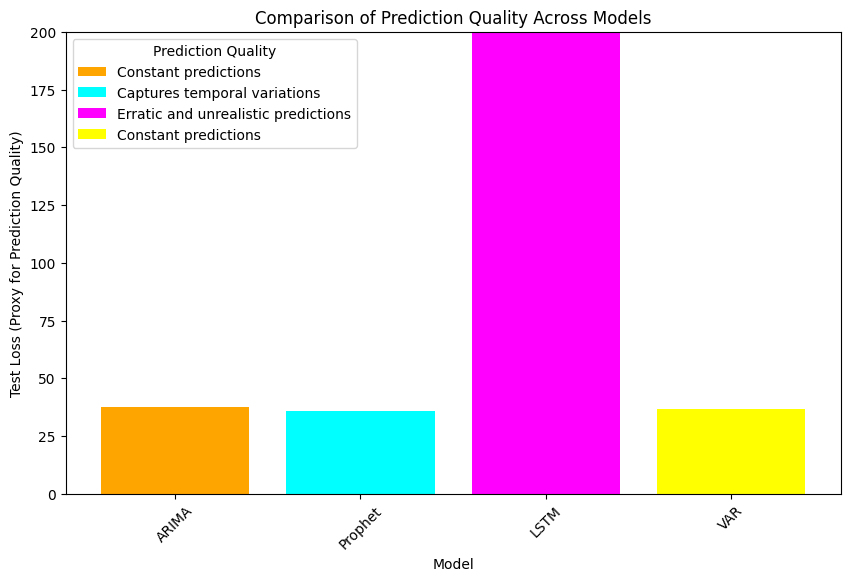

In [30]:
import matplotlib.pyplot as plt

# Data from the table
data = {
    'ARIMA': {'Test Loss': 37.47, 'Prediction Quality': 'Constant predictions'},
    'Prophet': {'Test Loss': 35.98, 'Prediction Quality': 'Captures temporal variations'},
    'LSTM': {'Test Loss': 33567.35, 'Prediction Quality': 'Erratic and unrealistic predictions'},
    'VAR': {'Test Loss': 36.80, 'Prediction Quality': 'Constant predictions'}
}

# Models
models = list(data.keys())

# Plotting
plt.figure(figsize=(10, 6))

# Updated colors for each model
colors = ['orange', 'cyan', 'magenta', 'yellow']  # Changed to different named colors

# Plotting each model's prediction quality
for i, model in enumerate(models):
    plt.bar(model, data[model]['Test Loss'], color=colors[i], label=data[model]['Prediction Quality'])

# Adjusting y-axis limits
plt.ylim(0, 200)  # Adjust the upper limit as needed

plt.xlabel('Model')
plt.ylabel('Test Loss (Proxy for Prediction Quality)')
plt.title('Comparison of Prediction Quality Across Models')
plt.xticks(rotation=45)
plt.legend(title='Prediction Quality')
plt.show()
